In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')

In [194]:
combined_df = pd.read_csv("C://Users/nilsa/Desktop/arabam_car_price_prediction/arabamDataset.csv")

In [195]:
combined_df

,adv_no,price,adv_date,car_brand,car_series,car_model,year,km,gear_type,fuel_type,...,acceleration,max_power,min_power,torque,city_fuel_consumption,highway_fuel_consumption,seats,trunk_capacity,aks_range,url
0,27928296.0,460000.0,09 Şubat 2025,Volkswagen,Jetta,1.9 TDi Midline,2008.0,275.000 km,Yarı Otomatik,Dizel,...,"11,8",4000.0,1900.0,250.0,"7,6",5,5.0,527.0,2578.0,https://www.arabam.com/ilan/galeriden-satilik-...
1,27306705.0,649900.0,09 Şubat 2025,Hyundai,i20,1.2 MPI Style,2014.0,43.000 km,Düz,Benzin,...,"12,7",6000.0,4000.0,121.0,"6,6","4,2",5.0,301.0,2570.0,https://www.arabam.com/ilan/galeriden-satilik-...
2,27927463.0,899750.0,09 Şubat 2025,Audi,A3,A3 Sportback 1.6 TDI Attraction,2013.0,144.000 km,Yarı Otomatik,Dizel,...,"10,9",3000.0,1500.0,250.0,"4,8","3,4",5.0,380.0,2636.0,https://www.arabam.com/ilan/galeriden-satilik-...
3,27927440.0,589750.0,09 Şubat 2025,Fiat,Linea,1.3 Multijet Pop,2017.0,137.000 km,Düz,Dizel,...,"13,8",4000.0,1500.0,200.0,"6,5",4,5.0,500.0,2603.0,https://www.arabam.com/ilan/galeriden-satilik-...
4,27789855.0,389000.0,09 Şubat 2025,Renault,Symbol,1.5 dCi Joy,2013.0,290.000 km,Düz,Dizel,...,"12,2",4000.0,1750.0,220.0,"4,4","3,2",5.0,510.0,2634.0,https://www.arabam.com/ilan/galeriden-satilik-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,27894435.0,1150000.0,06 Şubat 2025,Volkswagen,Passat,1.6 TDi BlueMotion Trendline,2017.0,213.000 km,Yarı Otomatik,Dizel,...,"10,8",4000.0,1750.0,250.0,"4,5","3,7",5.0,586.0,2791.0,https://www.arabam.com/ilan/sahibinden-satilik...
2346,27278182.0,480000.0,06 Şubat 2025,Peugeot,207,1.4 Millesim,2010.0,131.000 km,Otomatik,Benzin,...,"13,9",5250.0,3250.0,120.0,"8,4",5,5.0,267.0,2540.0,https://www.arabam.com/ilan/sahibinden-satilik...
2347,26593770.0,875000.0,06 Şubat 2025,Fiat,500 Ailesi,500L 1.3 Mjet Cross Plus,2018.0,88.750 km,Yarı Otomatik,Dizel,...,"15,5",3750.0,1500.0,200.0,"4,5","3,7",5.0,412.0,2612.0,https://www.arabam.com/ilan/sahibinden-satilik...
2348,27277449.0,250000.0,06 Şubat 2025,BMW,3 Serisi,318is,1993.0,320.000 km,Otomatik,Benzin,...,NaN,5500.0,4250.0,175.0,NaN,NaN,5.0,435.0,2700.0,https://www.arabam.com/ilan/sahibinden-satilik...


In [196]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adv_no                    2343 non-null   float64
 1   price                     2343 non-null   float64
 2   adv_date                  2343 non-null   object 
 3   car_brand                 2343 non-null   object 
 4   car_series                2343 non-null   object 
 5   car_model                 2337 non-null   object 
 6   year                      2343 non-null   float64
 7   km                        2343 non-null   object 
 8   gear_type                 2342 non-null   object 
 9   fuel_type                 2343 non-null   object 
 10  carbody_type              2335 non-null   object 
 11  color                     2343 non-null   object 
 12  engine_capacity           2301 non-null   object 
 13  engine_power              2306 non-null   object 
 14  engine_t

In [197]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adv_no                    2343 non-null   float64
 1   price                     2343 non-null   float64
 2   adv_date                  2343 non-null   object 
 3   car_brand                 2343 non-null   object 
 4   car_series                2343 non-null   object 
 5   car_model                 2337 non-null   object 
 6   year                      2343 non-null   float64
 7   km                        2343 non-null   object 
 8   gear_type                 2342 non-null   object 
 9   fuel_type                 2343 non-null   object 
 10  carbody_type              2335 non-null   object 
 11  color                     2343 non-null   object 
 12  engine_capacity           2301 non-null   object 
 13  engine_power              2306 non-null   object 
 14  engine_t

In [198]:
# Rename dictionary: Old column name -> Desired column name
rename_dict = {
    "adv_no": "Ad Number",
    "price":"Price",
    "adv_date": "Ad Date",
    "car_brand": "Brand",
    "car_series": "Series",
    "car_model": "Model",
    "year": "Year",
    "km": "Kilometer",
    "gear_type": "Gear Type",
    "fuel_type": "Fuel Type",
    "carbody_type": "Body Type",
    "color": "Color",
    "engine_capacity": "Engine Capacity (cc)",
    "engine_power": "Engine Power (hp)",
    "engine_trac": "Traction",
    "car_cond": "Car Condition",
    "mean_fuel_cons": "Average Fuel Consumption (lt)",
    "fuel_storage": "Fuel Tank (lt)",
    "paint_change": "Paint-changing",
    "trade_in": "Tradeable",
    "seller": "Seller",
    "warranty": "Warranty Status",
    "car_class": "Vehicle Class",
    "max_speed": "Maximum Speed ​​(km/h)",
    "acceleration": "Acceleration (0-100) (sec)",
    "max_power": "Maximum Power (rpm)",
    "min_power": "Minimum Power (rpm)",
    "torque": "Torque (nm)",
    "city_fuel_consumption": "City Fuel Consumption (lt)",
    "highway_fuel_consumption": "Highway Fuel Consumption (lt)",
    "seats": "Seats",
    "trunk_capacity": "Baggage Volume (lt)",
    "aks_range": "Axle Spacing (mm)"
}

combined_df.rename(columns=rename_dict, inplace=True)

print("New column names:\n", combined_df.columns)

New column names:
 Index(['Ad Number', 'Price', 'Ad Date', 'Brand', 'Series', 'Model', 'Year',
       'Kilometer', 'Gear Type', 'Fuel Type', 'Body Type', 'Color',
       'Engine Capacity (cc)', 'Engine Power (hp)', 'Traction',
       'Car Condition', 'Paint-changing', 'Average Fuel Consumption (lt)',
       'Fuel Tank (lt)', 'Tradeable', 'Seller', 'Warranty Status',
       'Vehicle Class', 'Maximum Speed ​​(km/h)', 'Acceleration (0-100) (sec)',
       'Maximum Power (rpm)', 'Minimum Power (rpm)', 'Torque (nm)',
       'City Fuel Consumption (lt)', 'Highway Fuel Consumption (lt)', 'Seats',
       'Baggage Volume (lt)', 'Axle Spacing (mm)', 'url'],
      dtype='object')


In [199]:
# EDA
combined_df = combined_df.dropna(subset=['Ad Number'])

In [200]:
combined_df.isnull().sum()

Ad Number                           0
Price                               0
Ad Date                             0
Brand                               0
Series                              0
Model                               6
Year                                0
Kilometer                           0
Gear Type                           1
Fuel Type                           0
Body Type                           8
Color                               0
Engine Capacity (cc)               42
Engine Power (hp)                  37
Traction                           38
Car Condition                      14
Paint-changing                      0
Average Fuel Consumption (lt)     615
Fuel Tank (lt)                    565
Tradeable                         701
Seller                              0
Warranty Status                  2343
Vehicle Class                     550
Maximum Speed ​​(km/h)            576
Acceleration (0-100) (sec)        591
Maximum Power (rpm)               733
Minimum Powe

In [201]:
#check the effect of paint and changing number on the price
combined_df['Paint-changing'].unique()

array(['1 değişen, 6 boyalı', '1 değişen, 1 boyalı', 'Belirtilmemiş',
       'Tamamı orjinal', '7 boyalı', '2 değişen, 3 boyalı', '3 boyalı',
       '7 değişen, 3 boyalı', '1 değişen, 3 boyalı',
       '1 değişen, 5 boyalı', '2 değişen, 6 boyalı', '2 boyalı',
       '1 değişen', '3 değişen, 8 boyalı', '4 boyalı', '2 değişen',
       '1 değişen, 2 boyalı', '3 değişen', 'Tamamı boyalı', '4 değişen',
       '3 değişen, 2 boyalı', '5 boyalı', '1 boyalı', '8 boyalı',
       '4 değişen, 2 boyalı', '6 değişen, 1 boyalı',
       '2 değişen, 4 boyalı', '2 değişen, 8 boyalı', '9 boyalı',
       '3 değişen, 5 boyalı', '6 boyalı', '1 değişen, 7 boyalı',
       '11 boyalı', '3 değişen, 3 boyalı', '2 değişen, 2 boyalı',
       '5 değişen', '2 değişen, 5 boyalı', '12 boyalı',
       '3 değişen, 7 boyalı', '4 değişen, 4 boyalı',
       '4 değişen, 3 boyalı', '1 değişen, 4 boyalı',
       '3 değişen, 1 boyalı', '2 değişen, 1 boyalı',
       '5 değişen, 3 boyalı', '1 değişen, 8 boyalı', '10 boyalı',
   

In [202]:
import pandas as pd
import numpy as np

#Creating 'changed number' and 'painted number' columns
combined_df['Change Number'] = combined_df['Paint-changing'].str.extract(r'(\d+)\s*değişen').astype(float)
combined_df['Painted Number'] = combined_df['Paint-changing'].str.extract(r'(\d+)\s*boyalı').astype(float)

# "Belirtilmemiş" veya "Tamamı orjinal" gibi değerleri 0 ile doldurma
combined_df['Change Number'] = combined_df['Change Number'].where(~combined_df['Paint-changing'].isin(['Belirtilmemiş', 'Tamamı orjinal']), 0)
combined_df['Painted Number'] = combined_df['Painted Number'].where(~combined_df['Paint-changing'].isin(['Belirtilmemiş', 'Tamamı orjinal']), 0)

# Sonuçları yazdırma
combined_df


,Ad Number,Price,Ad Date,Brand,Series,Model,Year,Kilometer,Gear Type,Fuel Type,...,Minimum Power (rpm),Torque (nm),City Fuel Consumption (lt),Highway Fuel Consumption (lt),Seats,Baggage Volume (lt),Axle Spacing (mm),url,Change Number,Painted Number
0,27928296.0,460000.0,09 Şubat 2025,Volkswagen,Jetta,1.9 TDi Midline,2008.0,275.000 km,Yarı Otomatik,Dizel,...,1900.0,250.0,"7,6",5,5.0,527.0,2578.0,https://www.arabam.com/ilan/galeriden-satilik-...,1.0,6.0
1,27306705.0,649900.0,09 Şubat 2025,Hyundai,i20,1.2 MPI Style,2014.0,43.000 km,Düz,Benzin,...,4000.0,121.0,"6,6","4,2",5.0,301.0,2570.0,https://www.arabam.com/ilan/galeriden-satilik-...,1.0,1.0
2,27927463.0,899750.0,09 Şubat 2025,Audi,A3,A3 Sportback 1.6 TDI Attraction,2013.0,144.000 km,Yarı Otomatik,Dizel,...,1500.0,250.0,"4,8","3,4",5.0,380.0,2636.0,https://www.arabam.com/ilan/galeriden-satilik-...,0.0,0.0
3,27927440.0,589750.0,09 Şubat 2025,Fiat,Linea,1.3 Multijet Pop,2017.0,137.000 km,Düz,Dizel,...,1500.0,200.0,"6,5",4,5.0,500.0,2603.0,https://www.arabam.com/ilan/galeriden-satilik-...,0.0,0.0
4,27789855.0,389000.0,09 Şubat 2025,Renault,Symbol,1.5 dCi Joy,2013.0,290.000 km,Düz,Dizel,...,1750.0,220.0,"4,4","3,2",5.0,510.0,2634.0,https://www.arabam.com/ilan/galeriden-satilik-...,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,27894435.0,1150000.0,06 Şubat 2025,Volkswagen,Passat,1.6 TDi BlueMotion Trendline,2017.0,213.000 km,Yarı Otomatik,Dizel,...,1750.0,250.0,"4,5","3,7",5.0,586.0,2791.0,https://www.arabam.com/ilan/sahibinden-satilik...,0.0,0.0
2346,27278182.0,480000.0,06 Şubat 2025,Peugeot,207,1.4 Millesim,2010.0,131.000 km,Otomatik,Benzin,...,3250.0,120.0,"8,4",5,5.0,267.0,2540.0,https://www.arabam.com/ilan/sahibinden-satilik...,NaN,2.0
2347,26593770.0,875000.0,06 Şubat 2025,Fiat,500 Ailesi,500L 1.3 Mjet Cross Plus,2018.0,88.750 km,Yarı Otomatik,Dizel,...,1500.0,200.0,"4,5","3,7",5.0,412.0,2612.0,https://www.arabam.com/ilan/sahibinden-satilik...,0.0,0.0
2348,27277449.0,250000.0,06 Şubat 2025,BMW,3 Serisi,318is,1993.0,320.000 km,Otomatik,Benzin,...,4250.0,175.0,NaN,NaN,5.0,435.0,2700.0,https://www.arabam.com/ilan/sahibinden-satilik...,0.0,0.0


In [203]:
#boş satırlar ve numeric değerlerin formatlarının düzenlenmesi
combined_df['Kilometer'] = combined_df['Kilometer'].str.replace(' km', '').str.replace('.', '').astype(float)
combined_df['Kilometer'].unique()

array([ 275000.,   43000.,  144000.,  137000.,  290000.,  239000.,
          6000.,   44000.,  132000.,   98000.,  226000.,  125000.,
        189000.,  183000.,  117000.,  280000.,  126000.,  100000.,
        300000.,   73000.,   68000.,   80000.,  139000.,  220000.,
        133000.,   81900.,   42000.,   19000.,   81500.,   59000.,
        118000.,  108000.,  251000.,   56000.,   74000.,  158000.,
        180000.,   85000.,  424500.,   82000.,   22000.,  129000.,
         94000.,  221000.,   92000.,  121000.,  305000.,  165000.,
        295000.,  174500.,  254000.,  166000.,  106000.,  618750.,
         47000.,   49900.,  105000.,  150000.,   58000.,  450000.,
        243000.,  127000.,   84000.,   83000.,  349876.,   78000.,
         65000.,   88900.,   70000.,  227000.,   27000.,  211531.,
        255000.,  118900.,  185000.,  120000.,  111000.,  146000.,
        215000.,   79000.,  146400.,  156000.,   93000.,   28000.,
         31000.,  175200.,  105348.,  115000.,  145000.,  1470

In [204]:
combined_df['Average Fuel Consumption (lt)'] = combined_df['Average Fuel Consumption (lt)'].str.replace(' lt', '').str.replace(',', '.').astype(float)
combined_df['Average Fuel Consumption (lt)'].unique()


array([ 5.9,  5.1,  3.9,  4.9,  6.6,  6.1,  nan,  3.6,  5.8,  4.6,  6.8,
        4.3,  5.3,  4.7,  6.4,  5.7,  6.5,  5. ,  4. ,  4.2,  3.8,  6.7,
        4.4,  4.8,  8.4,  6. ,  3.5,  6.2,  6.9,  4.5,  5.4,  4.1,  7. ,
        3.7,  5.6,  5.5,  7.5,  9.4,  7.6,  9.7,  7.7,  5.2,  7.4,  7.2,
        7.3,  8.2, 10.9,  8. ,  7.1,  6.3,  3.4,  7.8,  8.9,  9.9,  7.9,
        9.1,  8.5,  8.3,  3.2,  8.6, 14.1, 17. , 12.3,  8.1,  8.7, 10.7,
       11.1, 11.4, 10.8, 10.1, 11.5])

In [205]:
combined_df['Acceleration (0-100) (sec)'] = combined_df['Acceleration (0-100) (sec)'].str.replace(',', '.').astype(float)
combined_df['Acceleration (0-100) (sec)'].unique()


array([ 11.8,  12.7,  10.9,  13.8,  12.2,   8.9,  13.9,   nan,  17.9,
        14.3,   9.2,  10. ,  10.1,  13. ,   7.6,  10.5,   8.6,   8.5,
        15.2,   8.7,  12. ,  10.2,  10.8,  11.5,  10.3,   9.8,  15.3,
        13.5,  13.7,   9.7,   8.3,  12.9,  12.4,   9. ,  14.2,  14.5,
         7.9,  12.5,  11. ,   9.1,  11.9,  11.7,   9.9,  12.3,   7.3,
        16. ,   8. ,   7. ,  18. ,  12.8,   9.3,  13.4,  11.6,  15.5,
        14. ,  15.1, 118. ,   6.3,   6.2,  11.2,  12.1,  11.3,  14.9,
        11.1,  10.7,  16.5,  13.3,  14.6,   8.4,   7.8,  10.6,  17.1,
         8.1,  13.6,   5.2,   9.5,  12.6,   6.6,   8.2,  15. ,  11.4,
         7.7,  13.2,  15.7,  14.7,  10.4,  13.1,  18.1,  15.6,   5.7,
         7.1,  16.2,  15.4,  17.6,   5.8,   5. ,   4.7,   4.5,   7.4,
        14.1,   4.1,   3.4,   7.5,   4.3,  16.3,   8.8,   9.4,  16.4,
        14.8,  16.8,   9.6,   6.5,   7.2,  17.8,  16.7,  18.3,   6.9,
        20.5,  16.1,  14.4,  18.5,   4.6,   3.8,  17.5])

In [206]:
combined_df['City Fuel Consumption (lt)'] = combined_df['City Fuel Consumption (lt)'].str.replace(',', '.').astype(float)
combined_df['City Fuel Consumption (lt)'].unique()


array([ 7.6,  6.6,  4.8,  6.5,  4.4,  nan,  8.2,  4.3,  7.5,  5.7,  9.2,
        9.3,  6.7,  5.9,  7.7,  8.6,  5.8,  7.2,  9.6,  6.1,  5. ,  4.9,
        7.3,  8.5, 11.6,  7.9,  3.9,  6.4,  9. ,  7.8,  8. ,  6. ,  9.8,
        3.3,  5.3,  9.1,  4.2,  5.2,  9.7,  8.9,  4. ,  4.7,  6.3,  5.1,
        6.2, 10. , 13.1,  4.5,  7.1, 10.9,  9.5, 13.5,  8.7, 10.1,  5.5,
       11. ,  6.8,  9.4,  9.9,  6.9,  4.6,  5.4,  7.4,  7. ,  8.8,  5.6,
        8.3,  8.1, 11.2, 16. , 10.7, 12.7, 11.1,  4.1, 10.5,  8.4, 10.3,
       10.2, 14.5, 10.4, 12.4, 11.4, 11.8, 11.5,  3.4,  3.6, 10.8, 10.6,
       19.8, 11.3, 20. , 11.7, 12.2, 14.7, 11.9, 13. , 17.3, 12.5, 15.1,
       14.2, 16.4])

In [207]:
combined_df['Highway Fuel Consumption (lt)'] = combined_df['Highway Fuel Consumption (lt)'].str.replace(',', '.').astype(float)
combined_df['Highway Fuel Consumption (lt)'].unique()

array([ 5. ,  4.2,  3.4,  4. ,  3.2,  nan,  5.1,  5.7,  4.8,  5.5,  4.1,
        5.4,  4.5,  4.6,  4.4,  4.3,  3.5,  3.9,  5.6,  3.8,  5.2,  6.5,
        4.9,  3.3,  4.7,  5.3,  3.6,  6.1,  7.3,  6.3,  7.5,  6.2,  5.9,
        6. ,  3.7,  6.4,  8.1,  3.1,  6.7,  5.8,  7.4,  7.2,  6.6,  3. ,
        6.8,  8. ,  9.5, 14. ,  7. ,  8.3,  6.9,  9.7,  7.9,  8.2,  7.7,
        8.6])

In [208]:
combined_df['Engine Power (hp)'].unique()

array(['105', '84', '95', '90', '170', '101 - 125 HP', '80', '75', '136',
       '76 - 100 HP', '102', '204', '150', '126 - 150 HP', '51 - 75 HP',
       '122', '65', '129', '110', '115', '130', '140', '69',
       '226 - 250 HP', '72', '156', '76', '123', '100', '70', '125', '98',
       '120', '372', '71', '194', '128', '218', '151 - 175 HP', '109',
       '83', nan, '86', '111', '163', '258', '93', '143', '68', '107',
       '85', '112', '73', '132', '99', '121', '190', '280',
       '201 - 225 HP', '88', '551 - 575 HP', '630', '298', '176 - 200 HP',
       '207', '182', '116', '225', '96', '97', '251 - 275 HP',
       '501 - 525 HP', '252', '91', '82', '184', '180', '-', '177', '92',
       '87', '265', '233', '64', '124', '152', '60', '55', '101', '113',
       '320', '367', '544', '612', '376 - 400 HP', '220', '451 - 475 HP',
       '231', '276 - 300 HP', '576 - 600 HP', '526 - 550 HP', '761',
       '326 - 350 HP', '490', '493', "50 HP'ye kadar", '523', '74', '160',
       '126'

In [209]:
import numpy as np
import pandas as pd

def convert_hp(value):
    if pd.isna(value) or value == "-" or value.strip() == "":  # If missing or empty
        return np.nan

    value = str(value).replace(" HP'ye kadar", "").replace("HP", "").strip() # Clear HP word
    
    if "-" in value:  # If there is a gap
        try:
            low, high = value.split("-")  # Separate two numbers in range
            return (float(low.strip()) + float(high.strip())) / 2  # Take the average
        except ValueError:
            return np.nan  # If it is not a number, make it NaN

    try:
        return float(value)  # If it is an odd number, convert it directly to float
    except ValueError:
        return np.nan  # If it is not a number, make it NaN

combined_df["Engine Power (hp)"] = combined_df["Engine Power (hp)"].apply(convert_hp)

In [210]:
combined_df['Engine Power (hp)'].unique()

array([105.,  84.,  95.,  90., 170., 113.,  80.,  75., 136.,  88., 102.,
       204., 150., 138.,  63., 122.,  65., 129., 110., 115., 130., 140.,
        69., 238.,  72., 156.,  76., 123., 100.,  70., 125.,  98., 120.,
       372.,  71., 194., 128., 218., 163., 109.,  83.,  nan,  86., 111.,
       258.,  93., 143.,  68., 107.,  85., 112.,  73., 132.,  99., 121.,
       190., 280., 213., 563., 630., 298., 188., 207., 182., 116., 225.,
        96.,  97., 263., 513., 252.,  91.,  82., 184., 180., 177.,  92.,
        87., 265., 233.,  64., 124., 152.,  60.,  55., 101., 320., 367.,
       544., 612., 388., 220., 463., 231., 288., 588., 538., 761., 338.,
       490., 493.,  50., 523.,  74., 160., 126.,  77., 201., 173., 114.,
       131., 147., 106., 211., 363., 413., 488., 245., 601., 349., 802.,
       157.,  78., 135., 117.,  67., 108., 103.,  59.,  58.,  57.,  41.,
        66., 351., 306., 310., 400., 571., 585.])

In [211]:
combined_df['Engine Capacity (cc)'].unique()

array(['1896', '1248', '1598', '1461', '1496', '999', '1201 - 1400 cm3',
       '1240', '1582', '1499', '1390', '1968', '1595', '1498', '1368',
       '1401 - 1600 cm3', '1798', '1364', '998', "1200 cm3' e kadar",
       '1801 - 2000 cm3', '1396', '1150', '1998', '1360', '1422', '898',
       '1497', '1332', '2143', '1500', '1601 - 1800 cm3', '-', '1372',
       '1198', '1950', '1229', '1995', '1468', '1462', '1991', '1339',
       '1493', '1581', '1197', '1597', nan, '2498', '1596', '1341',
       '1560', '2148', '1490', '1395', '1590', '1149', '1398', '1794',
       '1399', '1799', '1199', '1329', '1796', '1997', '1599', '1400',
       '3501 - 4000 cm3', '5501 - 6000 cm3', '4196', '2720', '1969',
       '1388', '2501 - 3000 cm3', '1242', '1251', '1343', '1994', '1495',
       '1587', '1296', '1984', '2967', '1324', '1956', '1193', '1895',
       '1600', '1297', '1289', '1753', '1795', '1592', '875', '1996',
       '2989', '5980', '2993', '2496', '1586', '4308', '3996',
       '3001 -

In [212]:
def convert_cc(value):
    if pd.isna(value) or value == "-" or value.strip() == "":  # If missing or empty
        return np.nan

    value = str(value).replace(" cm3' e kadar", "").replace("cm3", "").strip() # clear cm3 word
    
    if "-" in value: # If there is a gap
        try:
            low, high = value.split("-")  # Separate two numbers in range
            return (float(low.strip()) + float(high.strip())) / 2  # Take the average
        except ValueError:
            return np.nan  # If it is not a number, make it NaN

    try:
        return float(value)  # If it is an odd number, convert it directly to float
    except ValueError:
        return np.nan  # If it is not a number, make it NaN

combined_df["Engine Capacity (cc)"] = combined_df["Engine Capacity (cc)"].apply(convert_cc)


In [213]:
combined_df['Engine Capacity (cc)'].unique()

array([1896. , 1248. , 1598. , 1461. , 1496. ,  999. , 1300.5, 1240. ,
       1582. , 1499. , 1390. , 1968. , 1595. , 1498. , 1368. , 1500.5,
       1798. , 1364. ,  998. , 1200. , 1900.5, 1396. , 1150. , 1998. ,
       1360. , 1422. ,  898. , 1497. , 1332. , 2143. , 1500. , 1700.5,
          nan, 1372. , 1198. , 1950. , 1229. , 1995. , 1468. , 1462. ,
       1991. , 1339. , 1493. , 1581. , 1197. , 1597. , 2498. , 1596. ,
       1341. , 1560. , 2148. , 1490. , 1395. , 1590. , 1149. , 1398. ,
       1794. , 1399. , 1799. , 1199. , 1329. , 1796. , 1997. , 1599. ,
       1400. , 3750.5, 5750.5, 4196. , 2720. , 1969. , 1388. , 2750.5,
       1242. , 1251. , 1343. , 1994. , 1495. , 1587. , 1296. , 1984. ,
       2967. , 1324. , 1956. , 1193. , 1895. , 1600. , 1297. , 1289. ,
       1753. , 1795. , 1592. ,  875. , 1996. , 2989. , 5980. , 2993. ,
       2496. , 1586. , 4308. , 3996. , 3250.5, 2197. , 1124. , 1206. ,
       1781. , 1397. , 2656. , 1365. , 1783. , 4750.5, 5250.5, 1389. ,
      

In [214]:
## feature engineering ##
combined_df['Car Age'] = 2025 - combined_df['Year']
combined_df.drop(columns=['Year'], inplace=True)

In [215]:
combined_df.isnull().sum()

Ad Number                           0
Price                               0
Ad Date                             0
Brand                               0
Series                              0
Model                               6
Kilometer                           0
Gear Type                           1
Fuel Type                           0
Body Type                           8
Color                               0
Engine Capacity (cc)               69
Engine Power (hp)                  40
Traction                           38
Car Condition                      14
Paint-changing                      0
Average Fuel Consumption (lt)     615
Fuel Tank (lt)                    565
Tradeable                         701
Seller                              0
Warranty Status                  2343
Vehicle Class                     550
Maximum Speed ​​(km/h)            576
Acceleration (0-100) (sec)        591
Maximum Power (rpm)               733
Minimum Power (rpm)               734
Torque (nm) 

In [216]:
combined_df['Seats'].value_counts()

Seats
5.0    1738
4.0      51
7.0       4
2.0       4
Name: count, dtype: int64

In [217]:
combined_df['Warranty Status'].value_counts()

Series([], Name: count, dtype: int64)

In [218]:
combined_df['Tradeable'].value_counts()

Tradeable
Takasa Uygun          1030
Takasa Uygun Değil     589
-                       23
Name: count, dtype: int64

In [219]:
combined_df['Color'].value_counts()

Color
Beyaz              802
Siyah              384
Gri                380
Füme               140
Kırmızı            123
Gri (Gümüş)        117
Mavi                94
Lacivert            58
Gri (metalik)       42
Kahverengi          37
Mavi (metalik)      30
Yeşil               29
Bordo               24
Bej                 23
Gri (titanyum)      17
Şampanya            14
Yeşil (metalik)      7
Sarı                 5
Turuncu              5
Diğer                5
Altın                4
Mor                  2
Turkuaz              1
Name: count, dtype: int64

In [220]:
combined_df['Model'].value_counts()

Model
1.3 Multijet Easy      46
1.5 dCi Joy            45
1.5 dCi Touch          35
1.5 dCi Icon           27
1.5 dCi Authentique    24
                       ..
350+ AMG                1
A4 Avant 2.5 TDI        1
1.4 TDI S-Rider         1
6                       1
1.4 Millesim            1
Name: count, Length: 958, dtype: int64

In [221]:
combined_df['Series'].value_counts()

Series
Egea       148
Megane     130
Clio       118
Corolla     88
Passat      67
          ... 
430          1
SX4          1
Ioniq        1
Jogger       1
Omega        1
Name: count, Length: 219, dtype: int64

In [222]:
del_columns = ['Ad Number','Ad Date','Series','Model','Color','Car Condition','Warranty Status','url','Paint-changing']
combined_df.drop(columns=del_columns, inplace=True)

In [223]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 0 to 2349
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Price                          2343 non-null   float64
 1   Brand                          2343 non-null   object 
 2   Kilometer                      2343 non-null   float64
 3   Gear Type                      2342 non-null   object 
 4   Fuel Type                      2343 non-null   object 
 5   Body Type                      2335 non-null   object 
 6   Engine Capacity (cc)           2274 non-null   float64
 7   Engine Power (hp)              2303 non-null   float64
 8   Traction                       2305 non-null   object 
 9   Average Fuel Consumption (lt)  1728 non-null   float64
 10  Fuel Tank (lt)                 1778 non-null   float64
 11  Tradeable                      1642 non-null   object 
 12  Seller                         2343 non-null   object

In [224]:
combined_df.drop_duplicates(inplace=True)

In [225]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2329 entries, 0 to 2349
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Price                          2329 non-null   float64
 1   Brand                          2329 non-null   object 
 2   Kilometer                      2329 non-null   float64
 3   Gear Type                      2328 non-null   object 
 4   Fuel Type                      2329 non-null   object 
 5   Body Type                      2321 non-null   object 
 6   Engine Capacity (cc)           2260 non-null   float64
 7   Engine Power (hp)              2289 non-null   float64
 8   Traction                       2291 non-null   object 
 9   Average Fuel Consumption (lt)  1714 non-null   float64
 10  Fuel Tank (lt)                 1764 non-null   float64
 11  Tradeable                      1638 non-null   object 
 12  Seller                         2329 non-null   object

In [226]:
combined_df.isnull().sum()

Price                              0
Brand                              0
Kilometer                          0
Gear Type                          1
Fuel Type                          0
Body Type                          8
Engine Capacity (cc)              69
Engine Power (hp)                 40
Traction                          38
Average Fuel Consumption (lt)    615
Fuel Tank (lt)                   565
Tradeable                        691
Seller                             0
Vehicle Class                    550
Maximum Speed ​​(km/h)           576
Acceleration (0-100) (sec)       591
Maximum Power (rpm)              730
Minimum Power (rpm)              731
Torque (nm)                      562
City Fuel Consumption (lt)       637
Highway Fuel Consumption (lt)    637
Seats                            546
Baggage Volume (lt)              582
Axle Spacing (mm)                562
Change Number                    576
Painted Number                   134
Car Age                            0
d

In [227]:
# Delete rows with NaN (blank) in the 'Gear Type' column
combined_df = combined_df.dropna(subset=['Gear Type'])

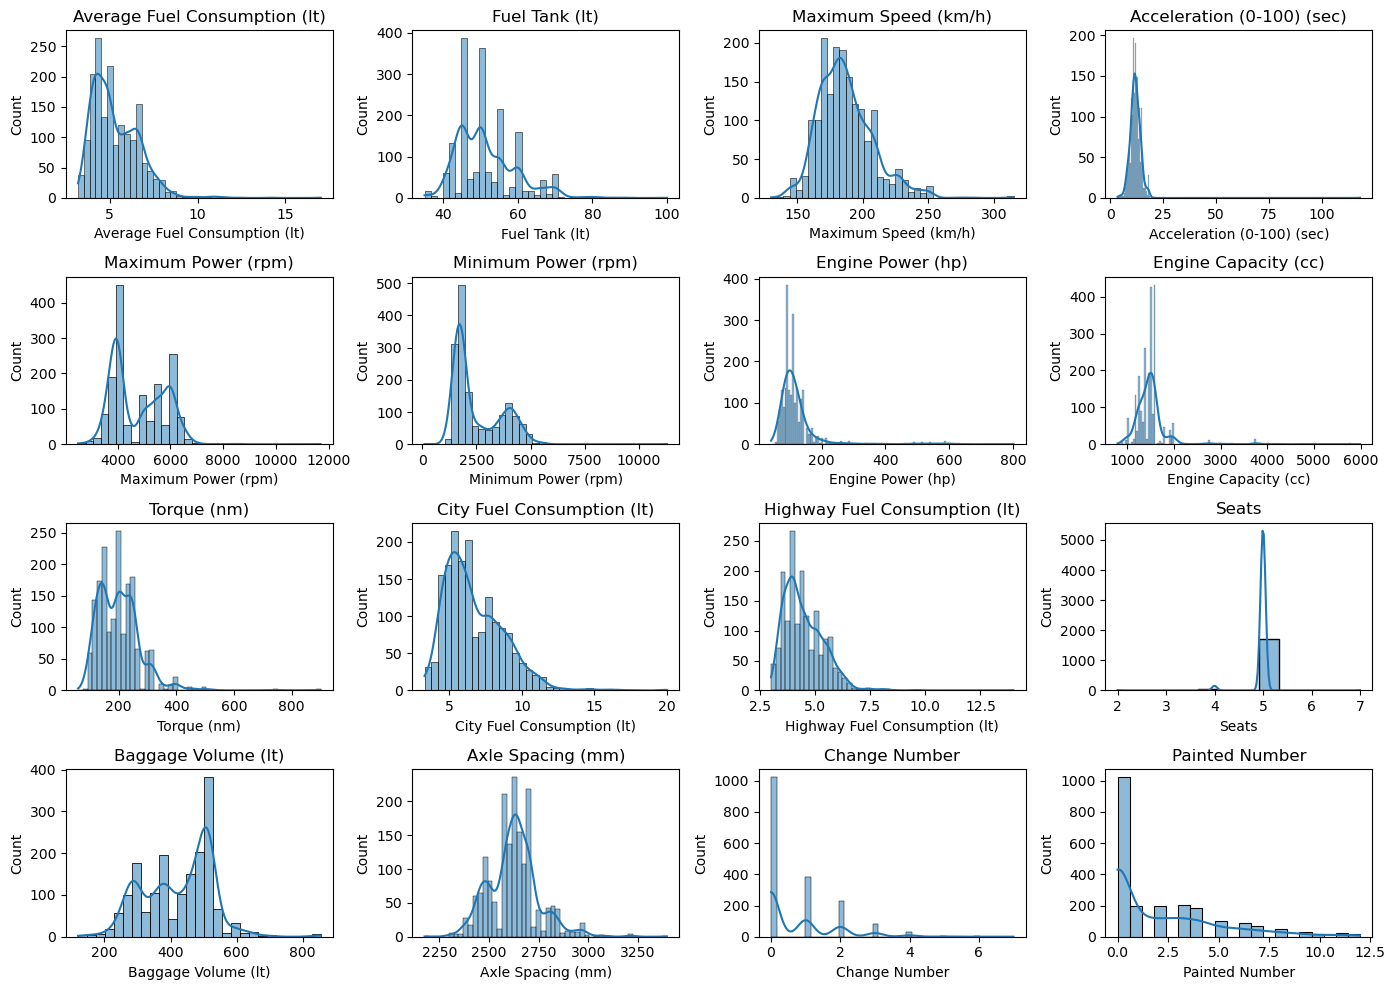

In [228]:
# Let's examine the distribution of numerical values ​​to decide how to fill in the gaps
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["Average Fuel Consumption (lt)", "Fuel Tank (lt)", "Maximum Speed ​​(km/h)", 
                "Acceleration (0-100) (sec)", "Maximum Power (rpm)", "Minimum Power (rpm)", 
                "Engine Power (hp)", "Engine Capacity (cc)", "Torque (nm)", "City Fuel Consumption (lt)", 
                "Highway Fuel Consumption (lt)", "Seats", "Baggage Volume (lt)", "Axle Spacing (mm)", 
                "Change Number", "Painted Number", ]

plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(combined_df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [229]:
# Use mean for those close to normal distribution
mean_fill_cols = ["Maximum Speed ​​(km/h)", "Fuel Tank (lt)"]
combined_df[mean_fill_cols] = combined_df[mean_fill_cols].fillna(combined_df[mean_fill_cols].mean())

In [230]:
# Use median for right skewed distributions
median_fill_cols = ["Average Fuel Consumption (lt)", "Acceleration (0-100) (sec)","Maximum Power (rpm)", 
                    "Minimum Power (rpm)", "Engine Power (hp)", "Engine Capacity (cc)", "Torque (nm)", 
                    "Highway Fuel Consumption (lt)", "City Fuel Consumption (lt)", 
                    "Baggage Volume (lt)", "Axle Spacing (mm)", "Change Number", "Painted Number"]


combined_df[median_fill_cols] = combined_df[median_fill_cols].fillna(combined_df[median_fill_cols].median())

In [231]:
# Use mode for categorical numeric variables
mode_fill_cols = ["Seats"]
for col in mode_fill_cols:
    if not combined_df[col].mode().empty:
        combined_df[col] = combined_df[col].fillna(combined_df[col].mode()[0])

In [232]:
combined_df.isnull().sum()

Price                              0
Brand                              0
Kilometer                          0
Gear Type                          0
Fuel Type                          0
Body Type                          7
Engine Capacity (cc)               0
Engine Power (hp)                  0
Traction                          37
Average Fuel Consumption (lt)      0
Fuel Tank (lt)                     0
Tradeable                        690
Seller                             0
Vehicle Class                    549
Maximum Speed ​​(km/h)             0
Acceleration (0-100) (sec)         0
Maximum Power (rpm)                0
Minimum Power (rpm)                0
Torque (nm)                        0
City Fuel Consumption (lt)         0
Highway Fuel Consumption (lt)      0
Seats                              0
Baggage Volume (lt)                0
Axle Spacing (mm)                  0
Change Number                      0
Painted Number                     0
Car Age                            0
d

In [233]:
combined_df=combined_df.dropna(subset=['Traction'])

In [234]:
combined_df.isnull().sum()

Price                              0
Brand                              0
Kilometer                          0
Gear Type                          0
Fuel Type                          0
Body Type                          6
Engine Capacity (cc)               0
Engine Power (hp)                  0
Traction                           0
Average Fuel Consumption (lt)      0
Fuel Tank (lt)                     0
Tradeable                        657
Seller                             0
Vehicle Class                    512
Maximum Speed ​​(km/h)             0
Acceleration (0-100) (sec)         0
Maximum Power (rpm)                0
Minimum Power (rpm)                0
Torque (nm)                        0
City Fuel Consumption (lt)         0
Highway Fuel Consumption (lt)      0
Seats                              0
Baggage Volume (lt)                0
Axle Spacing (mm)                  0
Change Number                      0
Painted Number                     0
Car Age                            0
d

In [235]:
combined_df['Tradeable'].unique()

array(['Takasa Uygun', 'Takasa Uygun Değil', nan, '-'], dtype=object)

In [236]:
# Assign 1 to 'Tradeable' items in the 'Tradeable' column and 0 to others
combined_df['Tradeable'] = combined_df['Tradeable'].apply(lambda x: 1 if x == 'Tradeable' else 0)

In [237]:
combined_df.isnull().sum()

Price                              0
Brand                              0
Kilometer                          0
Gear Type                          0
Fuel Type                          0
Body Type                          6
Engine Capacity (cc)               0
Engine Power (hp)                  0
Traction                           0
Average Fuel Consumption (lt)      0
Fuel Tank (lt)                     0
Tradeable                          0
Seller                             0
Vehicle Class                    512
Maximum Speed ​​(km/h)             0
Acceleration (0-100) (sec)         0
Maximum Power (rpm)                0
Minimum Power (rpm)                0
Torque (nm)                        0
City Fuel Consumption (lt)         0
Highway Fuel Consumption (lt)      0
Seats                              0
Baggage Volume (lt)                0
Axle Spacing (mm)                  0
Change Number                      0
Painted Number                     0
Car Age                            0
d

In [238]:
combined_df["Brand"].unique()

array(['Volkswagen', 'Hyundai', 'Audi', 'Fiat', 'Renault',
       'Mercedes - Benz', 'Nissan', 'BMW', 'Peugeot', 'Dacia', 'Skoda',
       'Honda', 'Opel', 'Toyota', 'Kia', 'Chevrolet', 'Citroen', 'Ford',
       'Tesla', 'MINI', 'Seat', 'Mitsubishi', 'Tofaş', 'Mazda',
       'Alfa Romeo', 'Jaguar', 'Volvo', 'DS Automobiles', 'Cupra',
       'Porsche', 'Subaru', 'Proton', 'Lancia', 'Smart', 'Suzuki',
       'Ferrari', 'Buick', 'Chery', 'Dodge', 'Bentley', 'Rover', 'Geely',
       'MG', 'Cadillac', 'Daihatsu'], dtype=object)

In [239]:
combined_df["Gear Type"].unique()

array(['Yarı Otomatik', 'Düz', 'Otomatik'], dtype=object)

In [240]:
combined_df["Fuel Type"].unique()

array(['Dizel', 'Benzin', 'LPG & Benzin', 'Hibrit', 'Elektrik'],
      dtype=object)

In [241]:
combined_df["Body Type"].unique()

array(['Sedan', 'Hatchback/5', 'Hatchback/3', 'Station wagon', 'MPV',
       'Coupe', '-', 'Cabrio', nan, 'SUV', 'Roadster'], dtype=object)

In [242]:
# Find the number of rows with "-"
count = (combined_df['Body Type'] == '-').sum()
print(count)

6


In [243]:
combined_df = combined_df.drop(combined_df[combined_df['Body Type'] == '-'].index)

In [244]:
combined_df.value_counts('Traction')

Traction
Önden Çekiş         1992
Arkadan İtiş         195
4WD (Sürekli)         84
AWD (Elektronik)      10
-                      4
Name: count, dtype: int64

In [245]:
combined_df = combined_df.drop(combined_df[combined_df['Traction'] == '-'].index)

In [246]:
combined_df.value_counts('Seller')

Seller
Galeriden          1187
Sahibinden         1083
Yetkili Bayiden      11
Name: count, dtype: int64

In [247]:
combined_df.value_counts('Vehicle Class')

Vehicle Class
C Segment    901
B Segment    539
D Segment    220
E Segment     55
A Segment     37
F Segment     16
G Segment      4
H Segment      1
Name: count, dtype: int64

In [248]:
combined_df.isnull().sum()

Price                              0
Brand                              0
Kilometer                          0
Gear Type                          0
Fuel Type                          0
Body Type                          6
Engine Capacity (cc)               0
Engine Power (hp)                  0
Traction                           0
Average Fuel Consumption (lt)      0
Fuel Tank (lt)                     0
Tradeable                          0
Seller                             0
Vehicle Class                    508
Maximum Speed ​​(km/h)             0
Acceleration (0-100) (sec)         0
Maximum Power (rpm)                0
Minimum Power (rpm)                0
Torque (nm)                        0
City Fuel Consumption (lt)         0
Highway Fuel Consumption (lt)      0
Seats                              0
Baggage Volume (lt)                0
Axle Spacing (mm)                  0
Change Number                      0
Painted Number                     0
Car Age                            0
d

In [249]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2281 entries, 0 to 2349
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Price                          2281 non-null   float64
 1   Brand                          2281 non-null   object 
 2   Kilometer                      2281 non-null   float64
 3   Gear Type                      2281 non-null   object 
 4   Fuel Type                      2281 non-null   object 
 5   Body Type                      2275 non-null   object 
 6   Engine Capacity (cc)           2281 non-null   float64
 7   Engine Power (hp)              2281 non-null   float64
 8   Traction                       2281 non-null   object 
 9   Average Fuel Consumption (lt)  2281 non-null   float64
 10  Fuel Tank (lt)                 2281 non-null   float64
 11  Tradeable                      2281 non-null   int64  
 12  Seller                         2281 non-null   object

In [250]:
combined_df['Vehicle Class'] = combined_df.groupby('Brand')['Vehicle Class'].transform(lambda grp: grp.fillna(grp.mode()[0] if not grp.mode().empty else 'Bilinmiyor'))

In [251]:
combined_df.isnull().sum()

Price                            0
Brand                            0
Kilometer                        0
Gear Type                        0
Fuel Type                        0
Body Type                        6
Engine Capacity (cc)             0
Engine Power (hp)                0
Traction                         0
Average Fuel Consumption (lt)    0
Fuel Tank (lt)                   0
Tradeable                        0
Seller                           0
Vehicle Class                    0
Maximum Speed ​​(km/h)           0
Acceleration (0-100) (sec)       0
Maximum Power (rpm)              0
Minimum Power (rpm)              0
Torque (nm)                      0
City Fuel Consumption (lt)       0
Highway Fuel Consumption (lt)    0
Seats                            0
Baggage Volume (lt)              0
Axle Spacing (mm)                0
Change Number                    0
Painted Number                   0
Car Age                          0
dtype: int64

In [252]:
combined_df.to_csv('arabam_analysis.csv')

In [253]:
combined_df.Brand.value_counts()

Brand
Renault            376
Fiat               275
Volkswagen         230
Opel               144
BMW                125
Hyundai            125
Mercedes - Benz    113
Toyota             111
Ford               110
Peugeot             94
Audi                93
Citroen             83
Skoda               67
Honda               63
Kia                 40
Nissan              38
Seat                31
Dacia               27
Chevrolet           18
Volvo               14
Tofaş               13
Mitsubishi          12
Porsche             12
Tesla               10
Alfa Romeo           8
MINI                 7
Mazda                7
DS Automobiles       6
Suzuki               5
Subaru               3
Geely                2
Bentley              2
Smart                2
Lancia               2
Cupra                2
Jaguar               2
Proton               1
Ferrari              1
Buick                1
Chery                1
Dodge                1
Rover                1
MG                   1
Cadil

In [254]:
brand_counts = combined_df["Brand"].value_counts()
combined_df["Brand"] = combined_df["Brand"].apply(lambda x: x if brand_counts[x] >= 40 else "Other")

In [255]:
dummy_df= pd.get_dummies(combined_df, columns = ['Brand', 'Gear Type', 'Fuel Type', 'Body Type', 'Traction', 'Seller', 'Vehicle Class'], dtype='int', drop_first=True)

In [256]:
dummy_df.columns

Index(['Price', 'Kilometer', 'Engine Capacity (cc)', 'Engine Power (hp)',
       'Average Fuel Consumption (lt)', 'Fuel Tank (lt)', 'Tradeable',
       'Maximum Speed ​​(km/h)', 'Acceleration (0-100) (sec)',
       'Maximum Power (rpm)', 'Minimum Power (rpm)', 'Torque (nm)',
       'City Fuel Consumption (lt)', 'Highway Fuel Consumption (lt)', 'Seats',
       'Baggage Volume (lt)', 'Axle Spacing (mm)', 'Change Number',
       'Painted Number', 'Car Age', 'Brand_BMW', 'Brand_Citroen', 'Brand_Fiat',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Kia',
       'Brand_Mercedes - Benz', 'Brand_Opel', 'Brand_Other', 'Brand_Peugeot',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Volkswagen',
       'Gear Type_Otomatik', 'Gear Type_Yarı Otomatik', 'Fuel Type_Dizel',
       'Fuel Type_Elektrik', 'Fuel Type_Hibrit', 'Fuel Type_LPG & Benzin',
       'Body Type_Coupe', 'Body Type_Hatchback/3', 'Body Type_Hatchback/5',
       'Body Type_MPV', 'Body Type_Roadster', 'Body 

In [257]:
dummy_df

,Price,Kilometer,Engine Capacity (cc),Engine Power (hp),Average Fuel Consumption (lt),Fuel Tank (lt),Tradeable,Maximum Speed ​​(km/h),Acceleration (0-100) (sec),Maximum Power (rpm),...,Seller_Sahibinden,Seller_Yetkili Bayiden,Vehicle Class_B Segment,Vehicle Class_Bilinmiyor,Vehicle Class_C Segment,Vehicle Class_D Segment,Vehicle Class_E Segment,Vehicle Class_F Segment,Vehicle Class_G Segment,Vehicle Class_H Segment
0,460000.0,275000.0,1896.0,105.0,5.9,55.0,0,187.000000,11.8,4000.0,...,0,0,0,0,1,0,0,0,0,0
1,649900.0,43000.0,1248.0,84.0,5.1,50.0,0,170.000000,12.7,6000.0,...,0,0,1,0,0,0,0,0,0,0
2,899750.0,144000.0,1598.0,105.0,3.9,50.0,0,195.000000,10.9,3000.0,...,0,0,0,0,1,0,0,0,0,0
3,589750.0,137000.0,1248.0,95.0,4.9,45.0,0,170.000000,13.8,4000.0,...,0,0,0,0,1,0,0,0,0,0
4,389000.0,290000.0,1461.0,90.0,3.9,50.0,0,167.000000,12.2,4000.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,1150000.0,213000.0,1598.0,120.0,4.0,66.0,0,206.000000,10.8,4000.0,...,1,0,0,0,0,1,0,0,0,0
2346,480000.0,131000.0,1360.0,91.0,6.3,50.0,0,170.000000,13.9,5250.0,...,1,0,1,0,0,0,0,0,0,0
2347,875000.0,88750.0,1248.0,95.0,4.0,50.0,0,163.000000,15.5,3750.0,...,1,0,0,0,1,0,0,0,0,0
2348,250000.0,320000.0,1796.0,140.0,5.0,63.0,0,186.742727,11.7,5500.0,...,1,0,0,0,0,1,0,0,0,0


In [258]:
numeric_column_names = combined_df.select_dtypes(include=['number']).columns.tolist()
numeric_column_names=numeric_column_names
numeric_df = combined_df[numeric_column_names]

<Axes: >

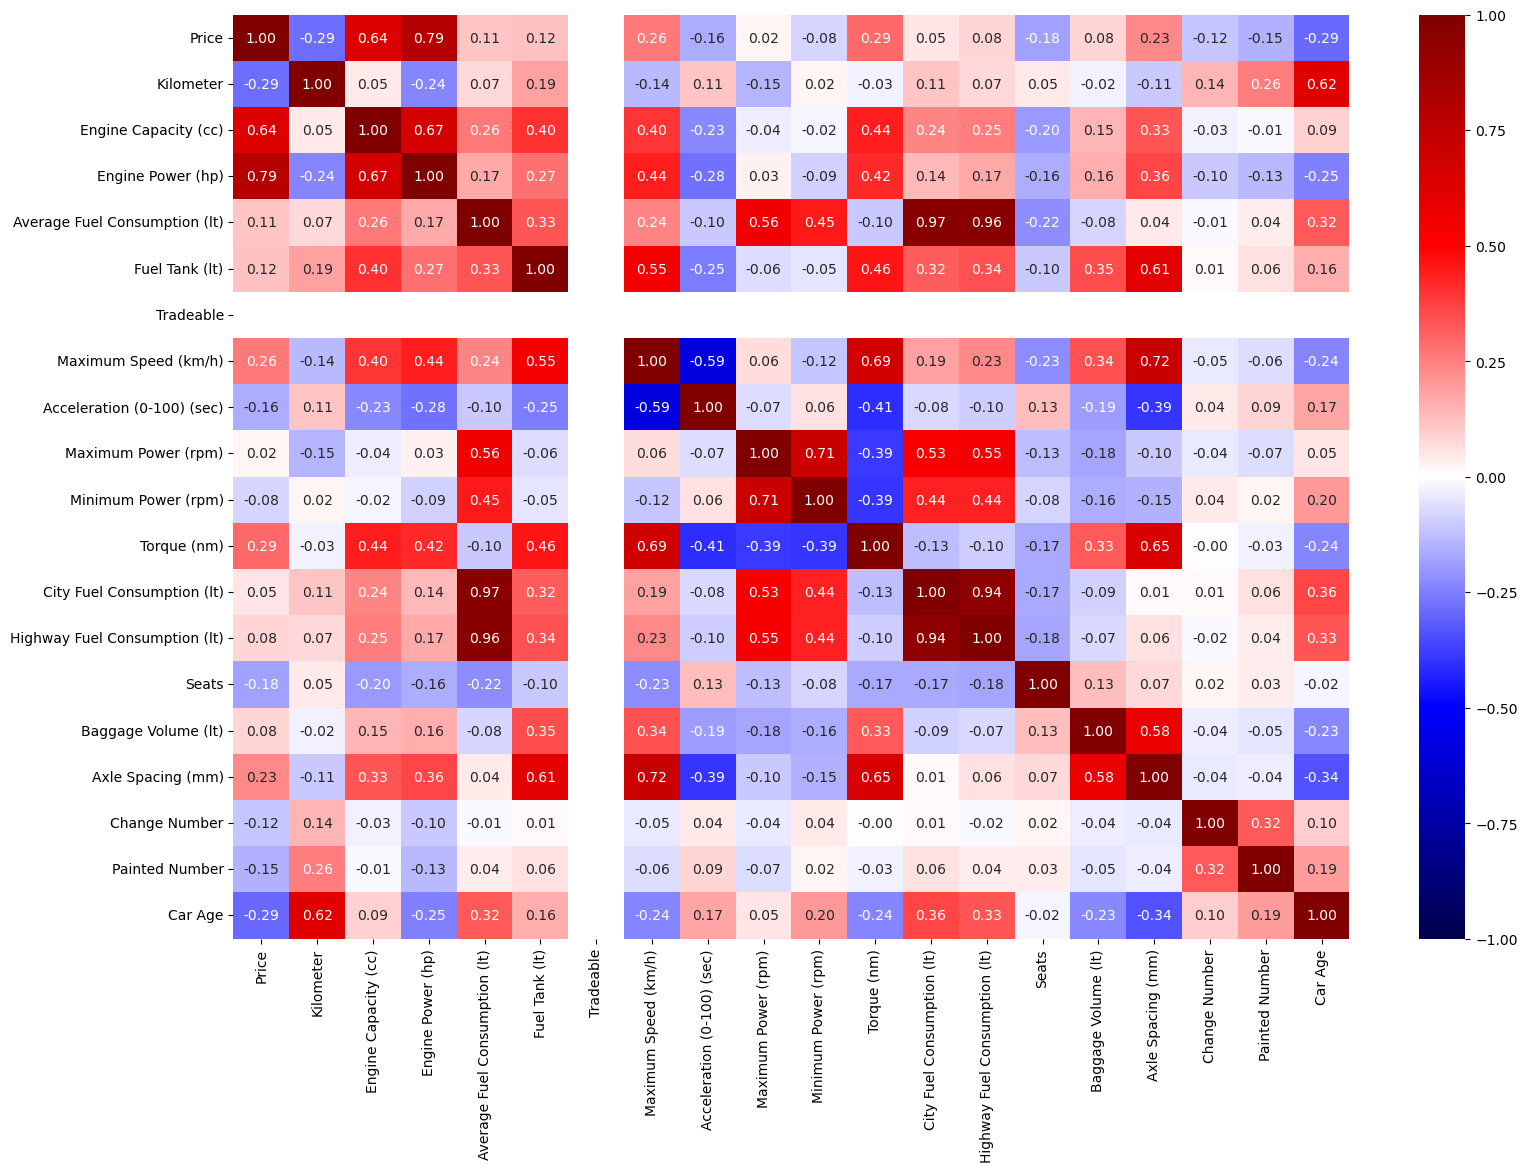

In [259]:
plt.figure(figsize=[18,12])
sns.heatmap(numeric_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f')

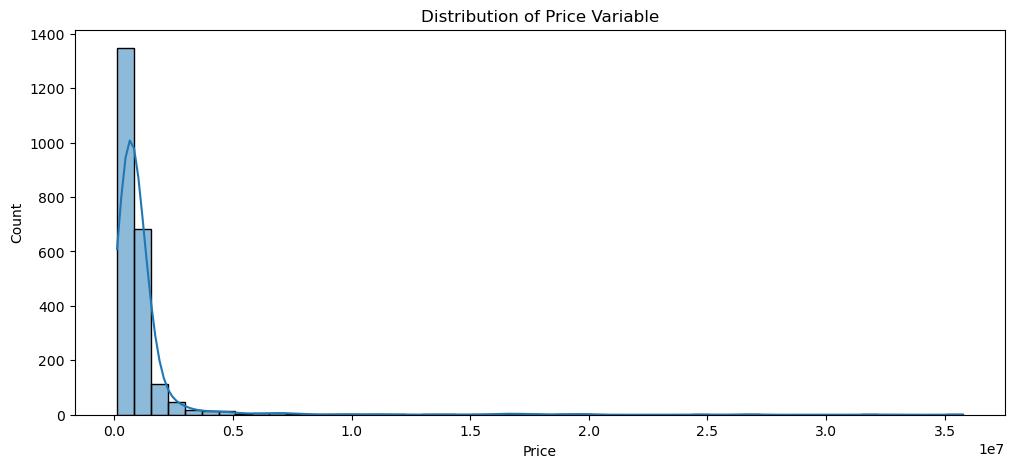

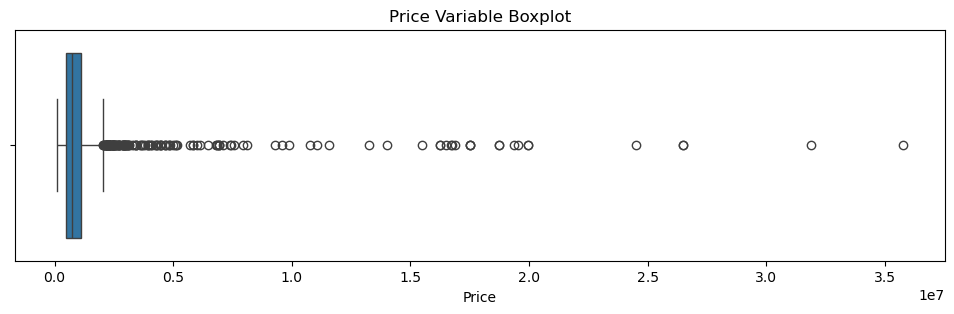

Skewness: 8.519880719383696
Kurtosis: 89.47222020295827


In [260]:
#Analysis of Outliers
# Histogram and KDE Plot
plt.figure(figsize=(12, 5))
sns.histplot(numeric_df["Price"], bins=50, kde=True)
plt.title("Distribution of Price Variable")
plt.show()

# Boxplot
plt.figure(figsize=(12, 3))
sns.boxplot(x=numeric_df["Price"])
plt.title("Price Variable Boxplot")
plt.show()

# Skewness and Kurtosis Calculation
skewness = skew(numeric_df["Price"])
kurt = kurtosis(numeric_df["Price"])
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

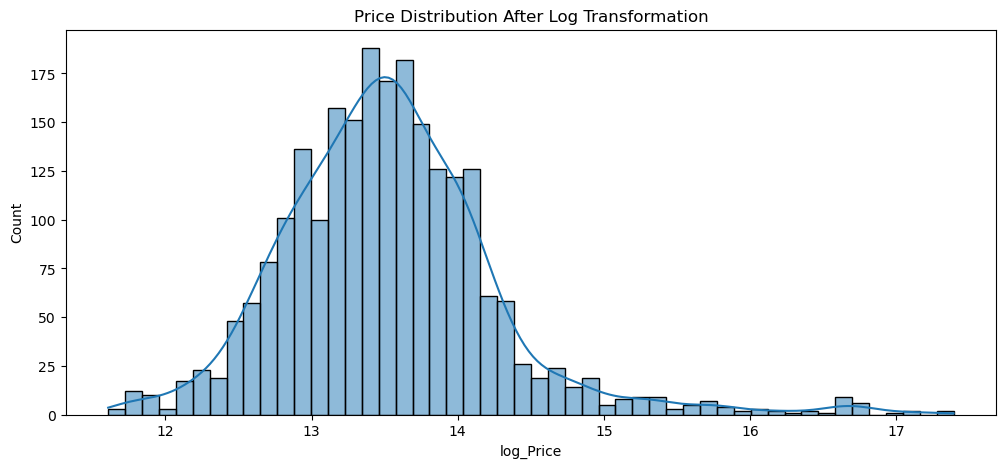

In [261]:
# We apply log transformation because the Price column is skewed to the right
numeric_df["log_Price"] = np.log1p(numeric_df["Price"]) # We use log(1 + Price) to avoid zero values

# Histogram after log transformation
plt.figure(figsize=(12, 5))
sns.histplot(numeric_df["log_Price"], bins=50, kde=True)
plt.title("Price Distribution After Log Transformation")
plt.show()

In [262]:
# Calculate the correlation matrix
numeric_df_corr = numeric_df.corr()

# Select correlations with 'price'
numeric_df_corr = numeric_df_corr['Price']

# Filter correlations greater than 0.5
numeric_df_corr = numeric_df_corr[abs(numeric_df_corr) > 0.4]

# Print the results
print("Numerical columns and ratios with correlation greater than 0.4 with Price:")
for column, corr_value in numeric_df_corr.items():
    print(f"{column}: {corr_value}")

Numerical columns and ratios with correlation greater than 0.4 with Price:
Price: 1.0
Engine Capacity (cc): 0.6361163048165328
Engine Power (hp): 0.7858188452276905
log_Price: 0.7134237581182092


<Axes: >

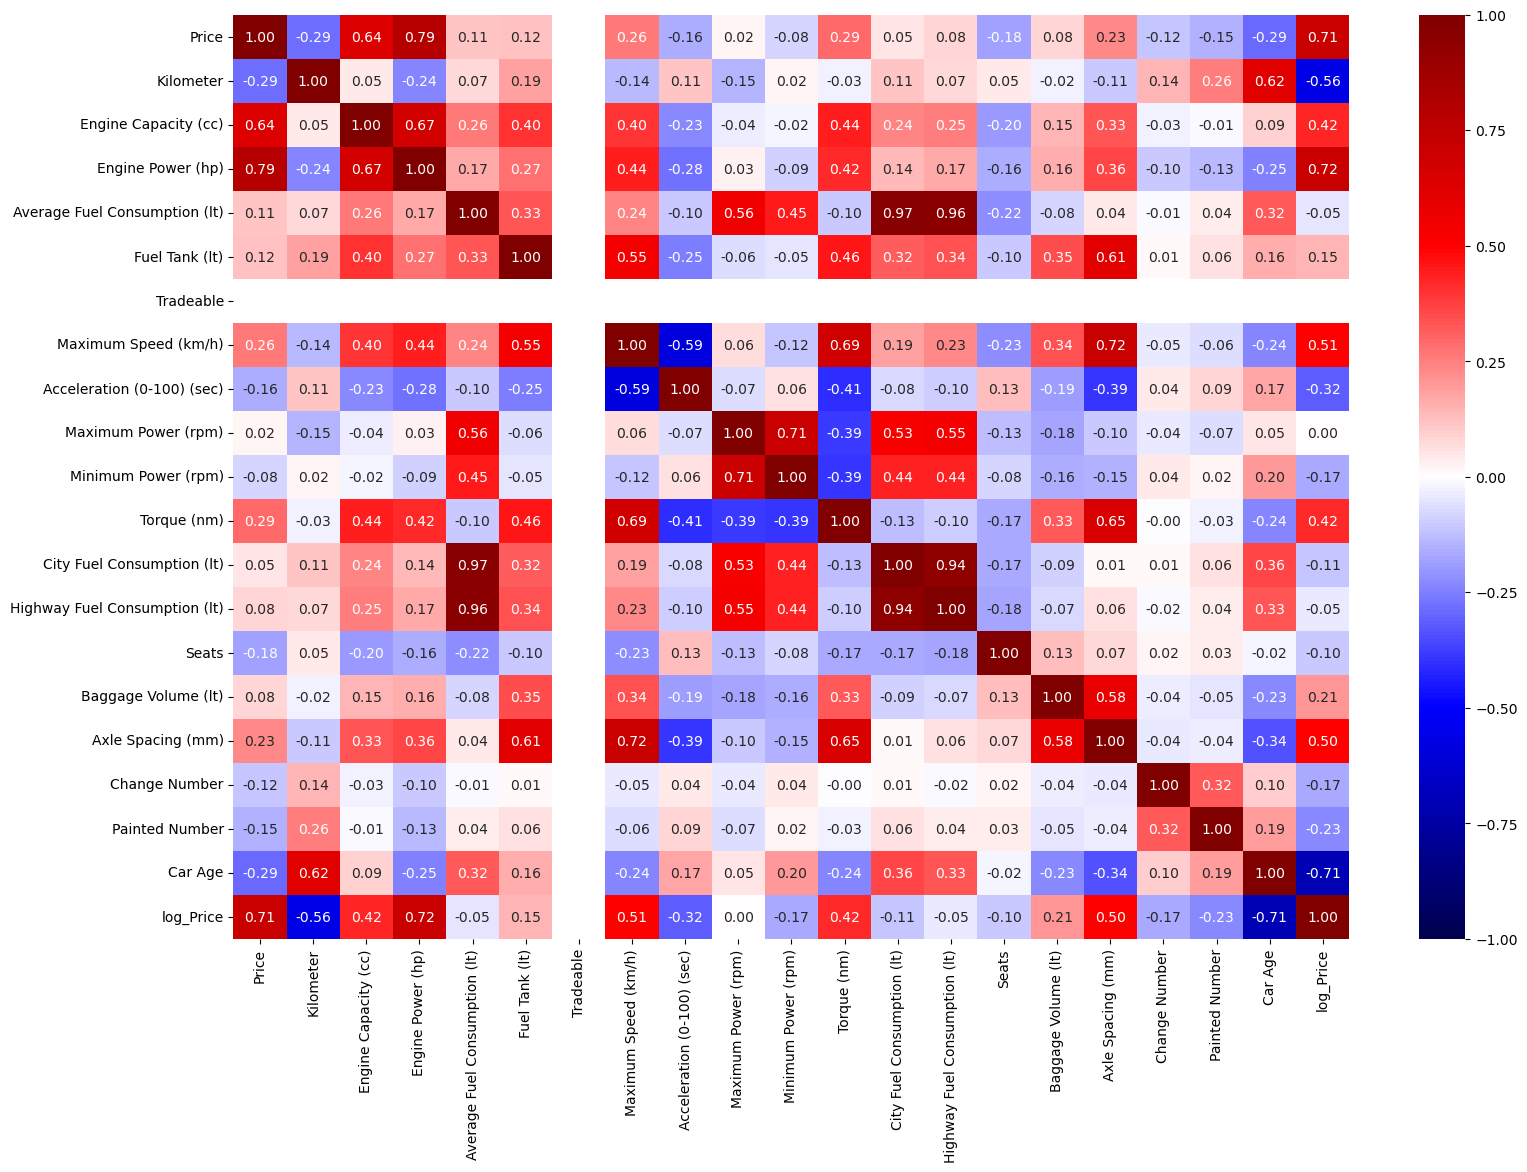

In [263]:
plt.figure(figsize=[18,12])
sns.heatmap(numeric_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f')

In [264]:
# Calculate the correlation matrix
numeric_df_corr = numeric_df.corr()

# Select correlations with 'price'
numeric_df_corr = numeric_df_corr['log_Price']

# Filter correlations greater than 0.5
numeric_df_corr = numeric_df_corr[abs(numeric_df_corr) > 0.4]

# Print the results
print("Numerical columns and ratios with correlation greater than 0.4 with log_Price:")
for column, corr_value in numeric_df_corr.items():
    print(f"{column}: {corr_value}")

Numerical columns and ratios with correlation greater than 0.4 with log_Price:
Price: 0.7134237581182092
Kilometer: -0.564690372760482
Engine Capacity (cc): 0.4233263639149269
Engine Power (hp): 0.7171185914627812
Maximum Speed ​​(km/h): 0.507299974224768
Torque (nm): 0.42151768125944694
Axle Spacing (mm): 0.504894079891105
Car Age: -0.7074754064191805
log_Price: 1.0


In [265]:
dummy_df["log_Price"] = np.log1p(dummy_df["Price"])

In [266]:
categoric_columns = ["Price",'log_Price', 'Brand_BMW', 'Brand_Citroen', 'Brand_Fiat',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Kia',
       'Brand_Mercedes - Benz', 'Brand_Opel', 'Brand_Other', 'Brand_Peugeot',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Volkswagen',
       'Gear Type_Otomatik', 'Gear Type_Yarı Otomatik', 'Fuel Type_Dizel',
       'Fuel Type_Elektrik', 'Fuel Type_Hibrit', 'Fuel Type_LPG & Benzin',
       'Body Type_Coupe', 'Body Type_Hatchback/3', 'Body Type_Hatchback/5',
       'Body Type_MPV', 'Body Type_Roadster', 'Body Type_SUV',
       'Body Type_Sedan', 'Body Type_Station wagon',
       'Traction_AWD (Elektronik)', 'Traction_Arkadan İtiş',
       'Traction_Önden Çekiş', 'Seller_Sahibinden', 'Seller_Yetkili Bayiden',
       'Vehicle Class_B Segment', 'Vehicle Class_Bilinmiyor',
       'Vehicle Class_C Segment', 'Vehicle Class_D Segment',
       'Vehicle Class_E Segment', 'Vehicle Class_F Segment',
       'Vehicle Class_G Segment', 'Vehicle Class_H Segment',]
categoric_df = dummy_df[categoric_columns]
categoric_df

,Price,log_Price,Brand_BMW,Brand_Citroen,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes - Benz,...,Seller_Sahibinden,Seller_Yetkili Bayiden,Vehicle Class_B Segment,Vehicle Class_Bilinmiyor,Vehicle Class_C Segment,Vehicle Class_D Segment,Vehicle Class_E Segment,Vehicle Class_F Segment,Vehicle Class_G Segment,Vehicle Class_H Segment
0,460000.0,13.038984,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,649900.0,13.384575,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,899750.0,13.709873,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,589750.0,13.287456,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,389000.0,12.871337,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,1150000.0,13.955273,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2346,480000.0,13.081543,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2347,875000.0,13.681980,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2348,250000.0,12.429220,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


<Axes: >

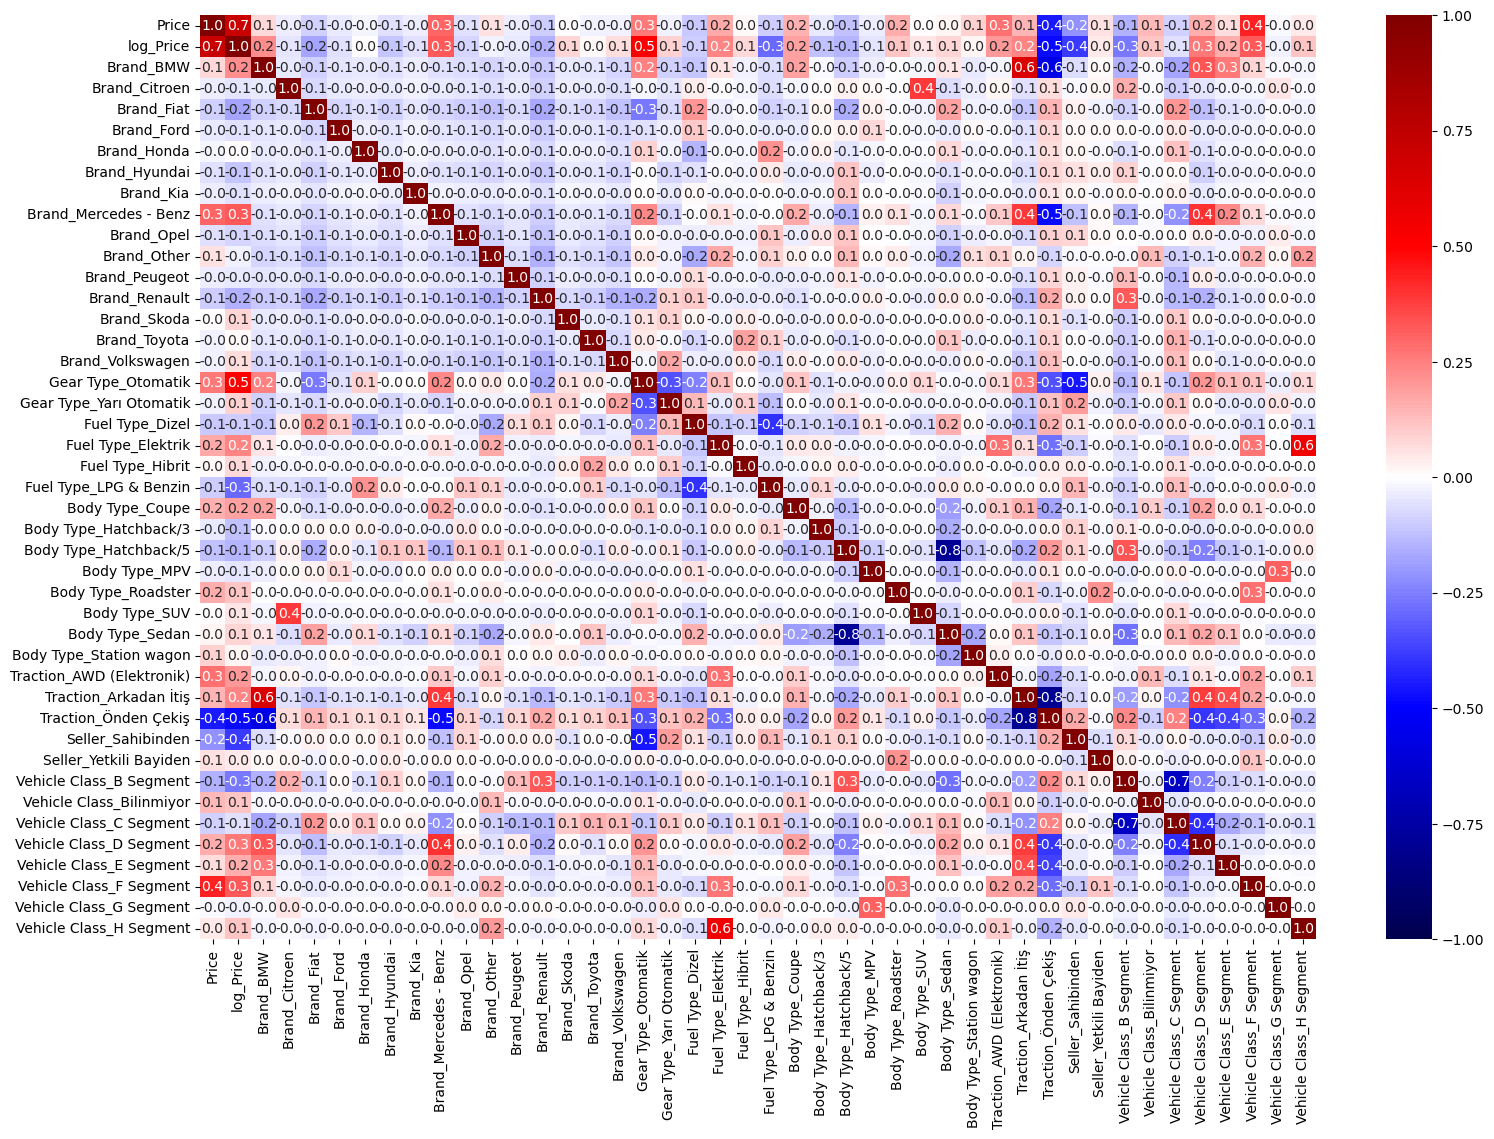

In [267]:
plt.figure(figsize=[18,12])
sns.heatmap(categoric_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f')

In [268]:
# Calculate the correlation matrix
categoric_df_corr = categoric_df.corr()

# Select correlations with 'price'
categoric_df_corr = categoric_df_corr['log_Price']

# Filter correlations greater than 0.5
categoric_df_corr = categoric_df_corr[abs(categoric_df_corr) > 0.4]

# Sonuçları yazdıralım
print("Categorical columns and their ratios with correlation greater than 0.4 with log_Price:")
for column, corr_value in categoric_df_corr.items():
    print(f"{column}: {corr_value}")

Categorical columns and their ratios with correlation greater than 0.4 with log_Price:
Price: 0.7134237581182092
log_Price: 1.0
Gear Type_Otomatik: 0.5082856826073571
Traction_Önden Çekiş: -0.4824443467549757


In [269]:
high_corr_col = ['Car Age','Axle Spacing (mm)','Maximum Speed ​​(km/h)','Engine Power (hp)','Engine Capacity (cc)','Kilometer','Gear Type_Otomatik','Traction_Önden Çekiş']

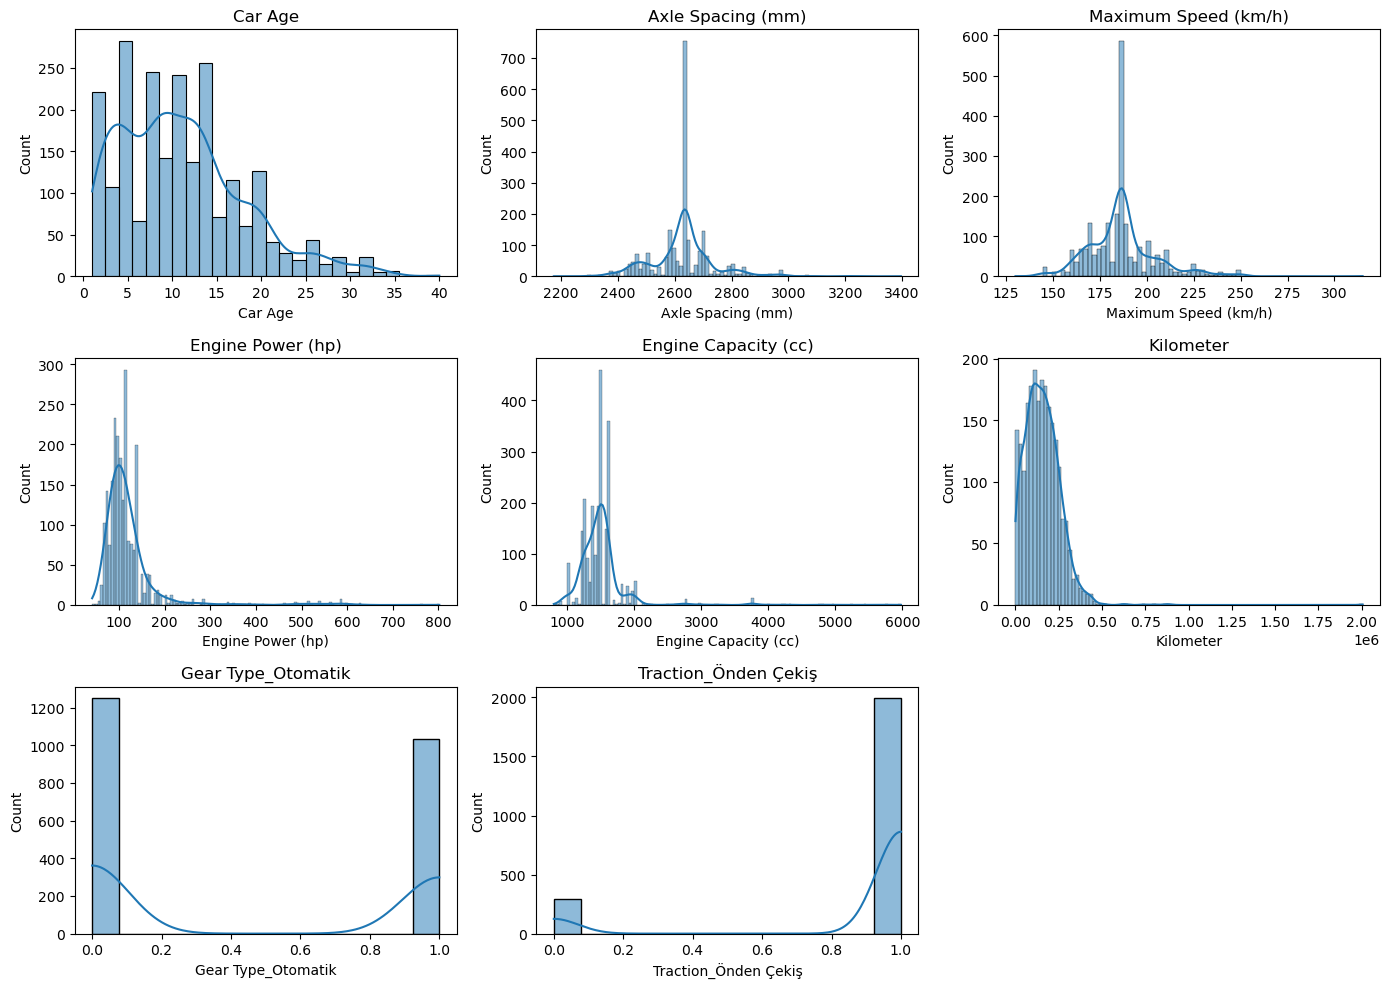

In [270]:
# Let's examine the distribution of numerical values ​​to decide how to fill in the gaps
high_corr_df = dummy_df[high_corr_col]
plt.figure(figsize=(14,10))
for i, col in enumerate(high_corr_df):
    plt.subplot(3,3, i+1)
    sns.histplot(high_corr_df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [271]:
dummy_df['Kilometer_log'] = np.log1p(dummy_df['Kilometer'])
dummy_df['Engine Power (hp)_log'] = np.log1p(dummy_df['Engine Power (hp)'])
dummy_df['Engine Capacity (cc)_log'] = np.log1p(dummy_df['Engine Capacity (cc)'])


In [272]:
selected_columns = ['Car Age','Axle Spacing (mm)','Maximum Speed ​​(km/h)',
                    'Gear Type_Otomatik','Traction_Önden Çekiş','Kilometer_log','Engine Power (hp)_log',
                    'Engine Capacity (cc)_log','Price','log_Price']
df = dummy_df[selected_columns]

In [273]:
x = df.drop(['Price', 'log_Price'], axis=1)
y = df['Price']


In [274]:
x_log = df.drop(['Price', 'log_Price'], axis=1)
y_log = df['log_Price']


In [275]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)# only do it once since x and x_log are the same

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Eğitim ve test ayırma
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_scaled, y_log, test_size=0.2, random_state=42)

# Normal Price Modeli
model_normal = LinearRegression()
model_normal.fit(x_train, y_train)
y_pred_normal = model_normal.predict(x_test)
rmse_normal = mean_squared_error(y_test, y_pred_normal, squared=False)

# Log Price Modeli
model_log = LinearRegression()
model_log.fit(x_train_log, y_train_log)
y_pred_log = model_log.predict(x_test_log)

# Log'tan geri dönüştürme
y_pred_log_transformed = np.expm1(y_pred_log)
y_test_log_transformed = np.expm1(y_test_log)
rmse_log = mean_squared_error(y_test_log_transformed, y_pred_log_transformed, squared=False)

print(f"Normal RMSE: {rmse_normal}")
print(f"Log Transformed RMSE: {rmse_log}")

Normal RMSE: 1574852.2898175477
Log Transformed RMSE: 1202098.6896362368


In [277]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Normal Model
r2_normal = r2_score(y_test, y_pred_normal)
rmse_normal = mean_squared_error(y_test, y_pred_normal, squared=False)

# Log Model
r2_log = r2_score(y_test_log, y_pred_log)

y_pred_log_transformed = np.expm1(y_pred_log)
y_test_log_transformed = np.expm1(y_test_log)

rmse_log = mean_squared_error(y_test_log_transformed, y_pred_log_transformed, squared=False)

print(f"Normal R²: {r2_normal}")
print(f"Normal RMSE: {rmse_normal}")
print(f"Log Transformed R²: {r2_log}")
print(f"Log Transformed RMSE: {rmse_log}")


Normal R²: 0.596749882047551
Normal RMSE: 1574852.2898175477
Log Transformed R²: 0.8817009105034666
Log Transformed RMSE: 1202098.6896362368


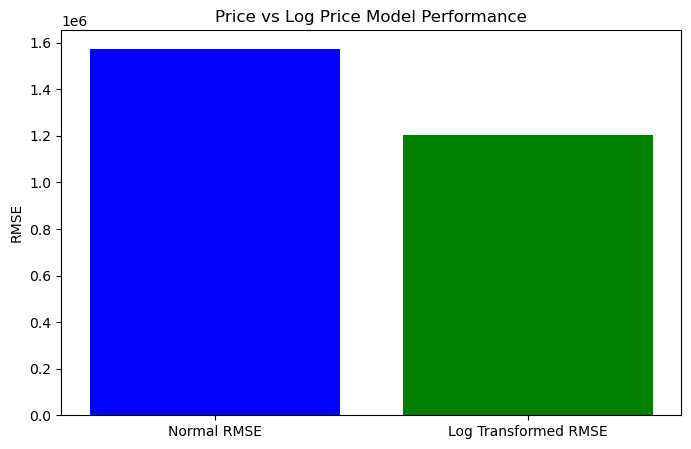

In [278]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(["Normal RMSE", "Log Transformed RMSE"], [rmse_normal, rmse_log], color=['blue', 'green'])
plt.title("Price vs Log Price Model Performance")
plt.ylabel("RMSE")
plt.show()

In [279]:
df.head()

,Car Age,Axle Spacing (mm),Maximum Speed ​​(km/h),Gear Type_Otomatik,Traction_Önden Çekiş,Kilometer_log,Engine Power (hp)_log,Engine Capacity (cc)_log,Price,log_Price
0,17.0,2578.0,187.0,0,1,12.524530,4.663439,7.548029,460000.0,13.038984
1,11.0,2570.0,170.0,0,1,10.668979,4.442651,7.130099,649900.0,13.384575
2,12.0,2636.0,195.0,0,1,11.877576,4.663439,7.377134,899750.0,13.709873
3,8.0,2603.0,170.0,0,1,11.827744,4.564348,7.130099,589750.0,13.287456
4,12.0,2634.0,167.0,0,1,12.577640,4.510860,7.287561,389000.0,12.871337


In [280]:
df.drop(columns= ['Price'])

,Car Age,Axle Spacing (mm),Maximum Speed ​​(km/h),Gear Type_Otomatik,Traction_Önden Çekiş,Kilometer_log,Engine Power (hp)_log,Engine Capacity (cc)_log,log_Price
0,17.0,2578.0,187.000000,0,1,12.524530,4.663439,7.548029,13.038984
1,11.0,2570.0,170.000000,0,1,10.668979,4.442651,7.130099,13.384575
2,12.0,2636.0,195.000000,0,1,11.877576,4.663439,7.377134,13.709873
3,8.0,2603.0,170.000000,0,1,11.827744,4.564348,7.130099,13.287456
4,12.0,2634.0,167.000000,0,1,12.577640,4.510860,7.287561,12.871337
...,...,...,...,...,...,...,...,...,...
2345,8.0,2791.0,206.000000,0,1,12.269052,4.795791,7.377134,13.955273
2346,15.0,2540.0,170.000000,1,1,11.782960,4.521789,7.215975,13.081543
2347,7.0,2612.0,163.000000,0,1,11.393590,4.564348,7.130099,13.681980
2348,32.0,2700.0,186.742727,1,0,12.676079,4.948760,7.493874,12.429220


In [281]:
import statsmodels.api as sm
# Definition of variables
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

# Adding a Constant Term to the Model
X = sm.add_constant(X)
# Creating the Model
model = sm.OLS(y, X)

# Training the Model
fit2 = model.fit()
# Display the summary table for the model we created
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2363.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        03:10:39   Log-Likelihood:                 121.97
No. Observations:                2281   AIC:                            -223.9
Df Residuals:                    2271   BIC:                            -166.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.3533      0.258     40.085      0.000       9.847      10.860
Car Age                     -0.0481      0.001    -45.164      0.000      -0.050      -0.046
Axle Spacing (mm)            0.0002   6.84e-05      3.603      0.000       0.000       0.000
Maximum Speed ​​(km/h)       0.0019      0.000      4.307      0.000       0.001       0.003
Gear Type_Otomatik           0.1482      0.011     13.076      0.000       0.126       0.170
Traction_Önden Çekiş        -0.2215      0.020    -11.234      0.000      -0.260      -0.183
Kilometer_log               -0.0583      0.008     -7.575      0.000      -0.073      -0.043
Engine Power (hp)_log        0.4764      0.028     17.314      0.000       0.422       0.530
Engine Capacity (cc)_log     0.1591      0.040      3.969      0.000       0.080       0.238
Price                     9.397e-08   3.55e-09     26.501      0.000     8.7e-08    1.01e-07
==============================================================================
Omnibus:                      148.201   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.412
Skew:                          -0.252   Prob(JB):                    1.46e-111
Kurtosis:                       5.262   Cond. No.                     1.33e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [282]:
# Creating the Model
lr1 = LinearRegression()

X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

# Modeli Eğitme
lr1.fit(X, y)

# R2 Değeri
r_squared1 = lr1.score(X,y)
print("R2:", round(r_squared1,3))

# Adjusted R2 Değeri
adjusted_r_squared1 = 1 - (1-r_squared1)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared1,3))

R2: 0.904
Adjusted R2: 0.903


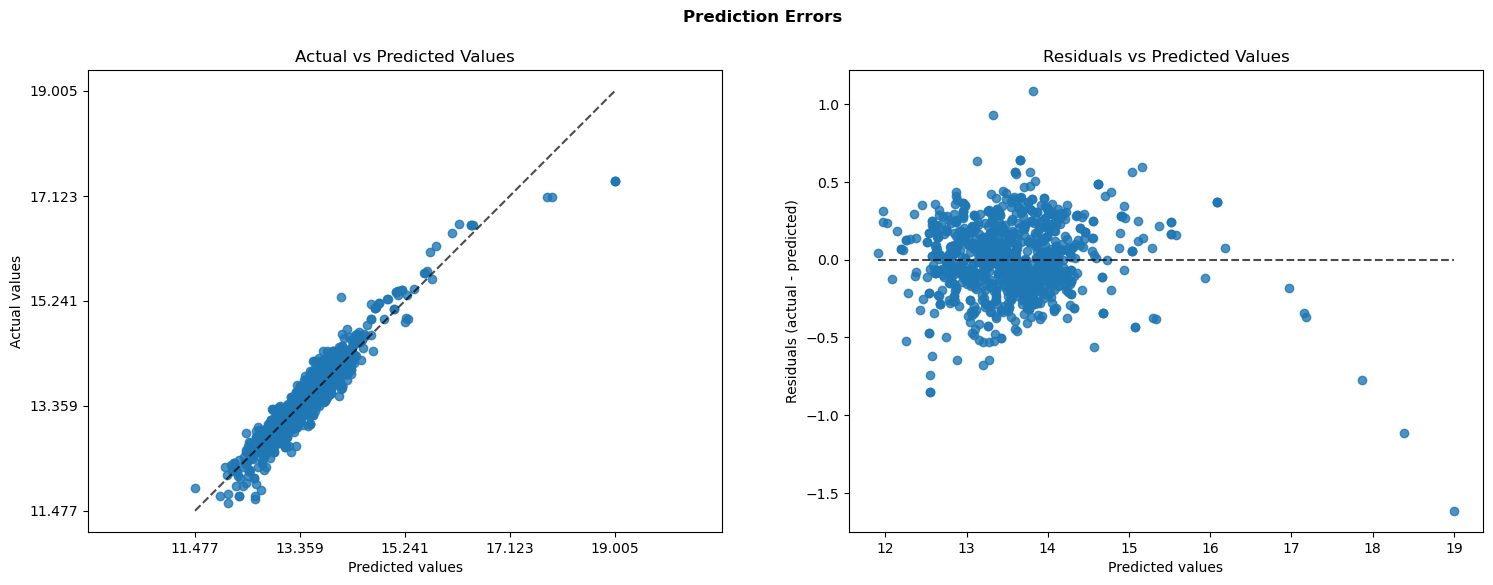

In [283]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

# Add a constant term to X (if you added it in the fit stage, you have to do it again)
X = sm.add_constant(X)

y_pred = fit2.predict(X)

fig, axs = plt.subplots(1, 2, figsize=[18, 6])
fig.suptitle("Prediction Errors", weight="bold")

PredictionErrorDisplay.from_predictions(y, y_pred, kind="actual_vs_predicted", ax=axs[0])
axs[0].set_title("Actual vs Predicted Values")

PredictionErrorDisplay.from_predictions(y, y_pred, kind="residual_vs_predicted", ax=axs[1])
axs[1].set_title("Residuals vs Predicted Values")

plt.show()


In [ ]:
dummy_df.to_pickle('dummy_salary_data.pkl')